<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Executive-Summary" data-toc-modified-id="Executive-Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Executive Summary</a></span></li><li><span><a href="#Problem-Definition" data-toc-modified-id="Problem-Definition-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem Definition</a></span></li><li><span><a href="#Preliminary-Data-Exploration" data-toc-modified-id="Preliminary-Data-Exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preliminary Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Consolidation" data-toc-modified-id="Consolidation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Consolidation</a></span></li><li><span><a href="#Demographic-Analysis" data-toc-modified-id="Demographic-Analysis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Demographic Analysis</a></span></li></ul></li><li><span><a href="#Visual-Analytics" data-toc-modified-id="Visual-Analytics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visual Analytics</a></span></li></ul></div>

In [83]:
# Data Wrangling
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 999)

# Helper Functions
import AnalyseHelpers as a
import CleanseHelpers as c
from time import time
randomstate = np.random.seed(123)
from sklearn import datasets

# Models
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import manifold
from sklearn import datasets
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis, KNeighborsRegressor)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, roc_auc_score, classification_report, r2_score


# Visualisation
from matplotlib import offsetbox
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8.0, 5.0]
import seaborn as sns
sns.set(font_scale=1)
cmap = sns.blend_palette(['r','b','g'], as_cmap = True)
# Set the styling for dataframes
dfstyles = [dict(selector="caption", props=[("font-size", "120%"),("color", "black"),("text-align", "center")])]
from IPython.display import display,HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<b>NOTE</b>: CleanseHelpers and AnalyseHelpers are supplementary modules, and should reside in the same directory as this notebook
<br>
The code for this notebook is, by default, hidden. To display the code cells, click <a href="javascript:code_toggle()">here</a>.\r\n''')

## Executive Summary
The objective of this report is to explore a dataset extracted from the 1994 Census database, using the following conditions:<br> ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)).<br><br> Analysis, focusses on using various visual analytics techniques to identify important structure in the data; to determine whether a person earns over 50K a year.

Data Source: https://archive.ics.uci.edu/ml/datasets/Census+Income

## Problem Definition
Using 1994 Census data, the task is to explore the data and provide conclusions on important structure in the data, relevant for the classification of a person earning more or less than £50k per year.  

## Preliminary Data Exploration

### Consolidation

In [43]:
boston_data = datasets.load_boston()
df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df['target'] = pd.Series(boston_data.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [44]:
boston_data = datasets.load_boston()
df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df['target'] = pd.Series(boston_data.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [45]:
# Profile the data using helper function
display(a.dataprofile(df).style.set_table_styles(dfstyles).set_caption('Data profile: Census data'))

,Column,Max Length Value,Max Length,Min Length Value,Min Length,Null #,Null %,Data Type,Unique Values,Row Count,Mean,Max,Min
0,CRIM,0.00632,7,0.1,3,0,0,float64,504,506,3.61352,88.9762,0.00632
1,ZN,100,5,0,3,0,0,float64,26,506,11.3636,100,0
2,INDUS,10.81,5,4,3,0,0,float64,76,506,11.1368,27.74,0.46
3,CHAS,0,3,0,3,0,0,float64,2,506,0.06917,1,0
4,NOX,0.4161,6,0.4,3,0,0,float64,81,506,0.554695,0.871,0.385
5,RM,6.575,5,6.8,3,0,0,float64,446,506,6.28463,8.78,3.561
6,AGE,100,5,2.9,3,0,0,float64,356,506,68.5749,100,2.9
7,DIS,10.7103,7,2.1,3,0,0,float64,412,506,3.79504,12.1265,1.1296
8,RAD,24,4,1,3,0,0,float64,9,506,9.54941,24,1
9,TAX,296,5,296,5,0,0,float64,66,506,408.237,711,187


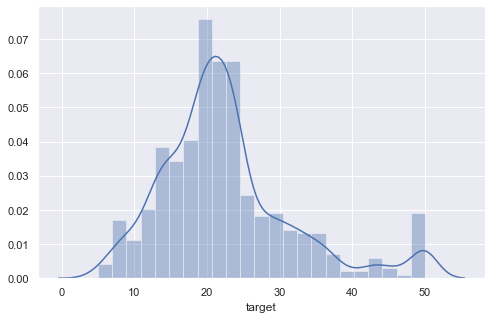

In [46]:
sns.distplot(df['target'])
plt.show()

One can see from the above table that there are 15 columns and 32561 observations. Categorical variables: workclass, occupation and native-country have null values denoted by "?". There are two data types: strings and integers.

### Demographic Analysis

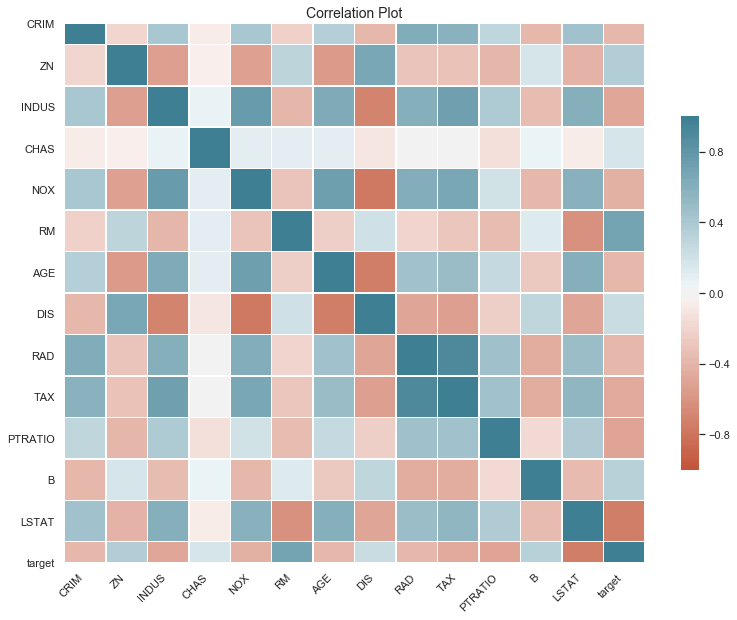

In [47]:
plt.rcParams['figure.figsize'] = [13.0, 13.0]
# Correlation plot for Numerical variables

ax = sns.heatmap(
    df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    linewidths=0.5 , cbar_kws={"shrink": 0.5},
    #annot=True,
    #annot_kws={"size": 12}
)

ax.set_title("Correlation Plot",size= 14)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
)

plt.show()

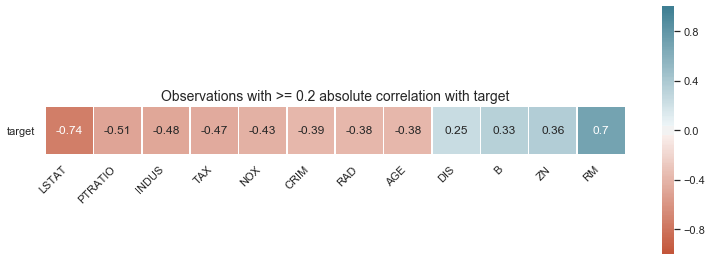

In [48]:
corr = df.corr()
# Observations with significant +ve or -ve correllation with over 50k
corr2 = pd.DataFrame(corr['target'][(corr['target'].abs() < 1) & (corr['target'].abs() >= 0.2)])

ax = sns.heatmap(
    corr2.sort_values(by='target').T, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    linewidths=0.5 , cbar_kws={"shrink": 0.35},
    annot=True,
    annot_kws={"size": 12}
)

ax.set_title("Observations with >= 0.2 absolute correlation with target",size= 14)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
)

plt.show()

In [120]:
df['target_binned'] = pd.cut(df['target'], bins=3, labels=False)

## Visual Analytics

In [121]:
# Scale and split
scaler = StandardScaler()
X = df.drop(['target_binned','target'],axis =1)
X_scaled = np.array(pd.DataFrame(scaler.fit_transform(X), columns = X.columns))
y_binned = np.array(df['target_binned'])
y = np.array(df['target'])

# Split Data into training and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binned, test_size=0.3, random_state = randomstate)
print("Training Shape: X =", X_train.shape, "y =", y_train.shape)
print("Validation Shape: X =", X_test.shape, "y =",y_test.shape)

Training Shape: X = (354, 13) y = (354,)
Validation Shape: X = (152, 13) y = (152,)


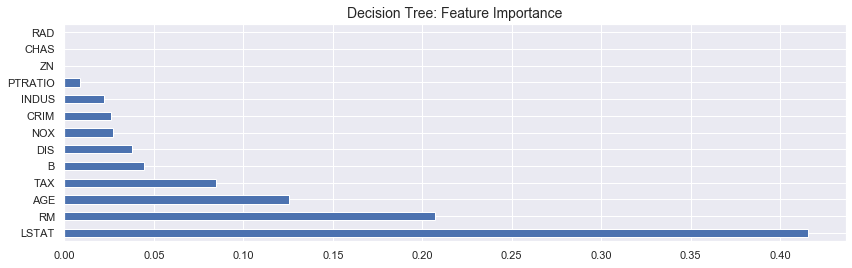

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        64
           1       0.78      0.84      0.81        69
           2       0.74      0.74      0.74        19

    accuracy                           0.82       152
   macro avg       0.81      0.80      0.80       152
weighted avg       0.83      0.82      0.82       152



In [127]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train)
dt_preds = dt.predict(X_test)

# plot feature importance
plt.rcParams['figure.figsize'] = [14,4]
feature_importances = pd.Series(dt.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.title("Decision Tree: Feature Importance", size="14")
plt.show()

print("Classification Report")
print(classification_report(y_test, dt_preds))

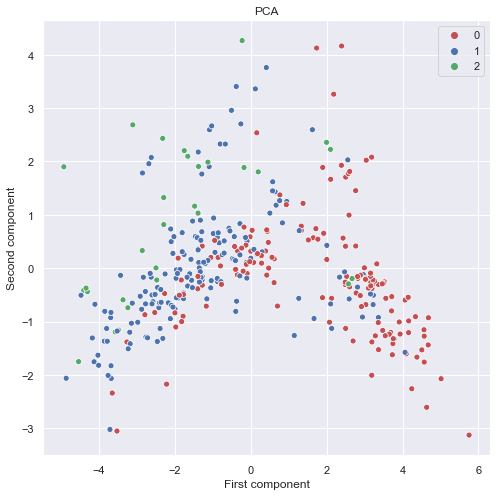

explained variance ratio (first  13  components): [0.4674377  0.1154041  0.09475705 0.0648114  0.06107593 0.05415881
 0.04128809 0.03485289 0.02263442 0.01583891 0.01397223 0.00971474
 0.0040537 ]


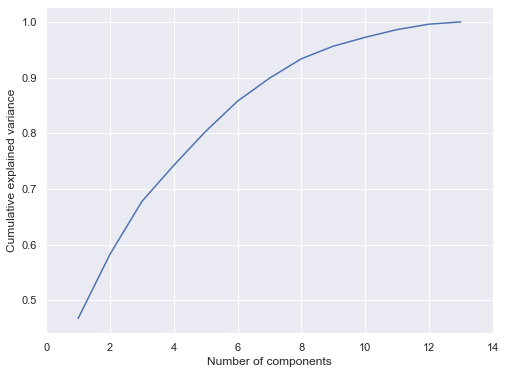

In [123]:
comp = 13

pca = PCA(n_components=comp)
X_r = pca.fit(X_train).transform(X_train)
X_r_test = pca.fit(X_test).transform(X_test)

plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.figure()
ax = sns.scatterplot(X_r[:,0],X_r[:,1], hue=y_train,palette=cmap)
plt.title('PCA')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.show()

# Percentage of variance explained for each components
print('explained variance ratio (first ', comp, ' components):', str(pca.explained_variance_ratio_))

plt.rcParams['figure.figsize'] = [8.0, 4.0]

plt.figure(figsize=(8,6))
plt.plot(range(1,comp+1,1),np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,comp+1,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

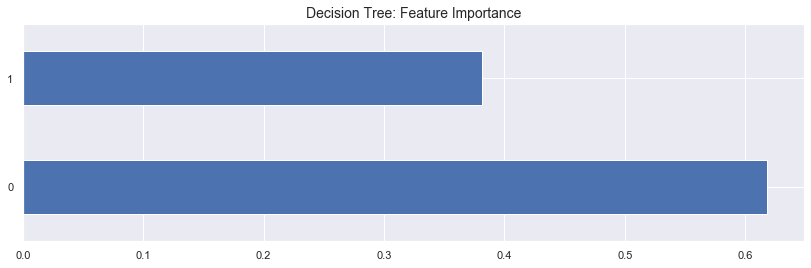

Classification Report
              precision    recall  f1-score   support

           0       0.51      0.61      0.56        64
           1       0.43      0.35      0.38        69
           2       0.15      0.16      0.15        19

    accuracy                           0.43       152
   macro avg       0.36      0.37      0.36       152
weighted avg       0.43      0.43      0.43       152



In [124]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_r[:,0:2],y_train)
dt_preds = dt.predict(X_r_test[:,0:2])

# plot feature importance
plt.rcParams['figure.figsize'] = [14,4]
feature_importances = pd.Series(dt.feature_importances_, index=[0,1])
feature_importances.nlargest(20).plot(kind='barh')
plt.title("Decision Tree: Feature Importance", size="14")
plt.show()

print("Classification Report")
print(classification_report(y_test, dt_preds))

In [ ]:
gammalist = [0.1,0.2,0.7,1,3,5,7,15,30] 
kernellist = ['poly','rbf', 'rbf' , 'sigmoid' , 'cosine']
plt.rcParams['figure.figsize'] = [6.0, 6.0]
for k in kernellist:
    for g in gammalist:
        kpca = KernelPCA(kernel=k, fit_inverse_transform=False, gamma=g)
        comp = 2
        n_points = len(X_scaled)

        X_kpca = kpca.fit(X_scaled[:n_points]).transform(X_scaled[:n_points])
        reds = y[:n_points] == 0
        blues = y[:n_points] == 4
        plt.figure()
        plt.figure()
        ax = sns.scatterplot(X_kpca[:,0],X_kpca[:,1], hue=y,palette=cmap)
        plt.title('KPCA with ' + k +' Kernel:' + str(g))
        plt.xlabel('First component')
        plt.ylabel('Second component')
        plt.show()
        """
        plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
                s=15, edgecolor='k', label='<=50K')
        plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
                s=15, edgecolor='k', label='>50K')
                
        plt.title('KPCA with ' + k +' Kernel:' + str(g))
        plt.legend(loc='best', shadow=False, scatterpoints=1)
        plt.show()
        """

In [ ]:
plt.show()

ISO: 4.7 sec


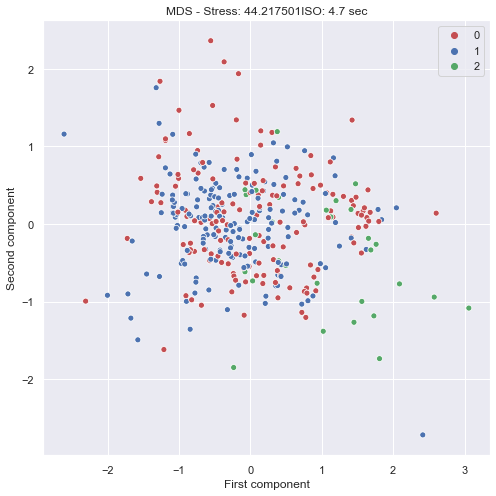

In [125]:
from matplotlib import cm
comp = 13

clf = manifold.MDS(n_components=comp, n_init=8, max_iter=200,n_jobs = -1)
t0 = time()
X_mds = clf.fit_transform(X_train)
X_mds_test = clf.fit_transform(X_test)
t1 = time()
print("%s: %.2g sec" % ('ISO', t1 - t0))

plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.figure()
ax = sns.scatterplot(X_mds[:,0],X_mds[:,1], hue=y_train,palette=cmap)
plt.title(("MDS - Stress: %f" % clf.stress_) + ("%s: %.2g sec" % ('ISO', t1 - t0)))
plt.xlabel('First component')
plt.ylabel('Second component')
plt.show()


In [126]:
#dt = DecisionTreeClassifier(random_state=0)
#dt.fit(X_mds,y_train)
#dt_preds = dt.predict(X_mds_test)

knn = KNeighborsClassifier()
knn.fit(X_mds,y_train)
knn_preds = knn.predict(X_mds_test)

print("Classification Report")
print(classification_report(y_test, knn_preds))

Classification Report
              precision    recall  f1-score   support

           0       0.29      0.31      0.30        64
           1       0.30      0.36      0.33        69
           2       0.00      0.00      0.00        19

    accuracy                           0.30       152
   macro avg       0.20      0.22      0.21       152
weighted avg       0.26      0.30      0.28       152



C:\Users\durandt\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
dt = DecisionTreeClassifier(random_state = randomstate)
dt.fit(X_mds,y_train)
dt_preds = dt.predict(X_test)
# confusion matrix
dt_cm = pd.DataFrame(confusion_matrix(y_test, dt_preds), columns=np.unique(y_test), index = np.unique(y_test))
dt_cm.index.name = 'Actual'
dt_cm.columns.name = 'Predicted'

plt.figure(figsize=(5,4))
ax= plt.subplot()
plt.title('Decision Tree: Confusion Matrix', size=14)
sns.heatmap(dt_cm, annot=True, ax=ax, fmt = 'g',cmap='Blues', annot_kws={"size": 20}); 
ax.set_xlabel('Predicted', fontsize=14)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['False', 'True'], fontsize = 14)
ax.xaxis.tick_top()
ax.set_ylabel('Actual', fontsize=14)
ax.yaxis.set_ticklabels(['False', 'True'], fontsize = 14)
plt.show()
print("Classification Report")
print(classification_report(y_test, dt_preds))

In [ ]:
n_neighbors = 25
n_points = len(X_scaled)
comp = 2
# Perform Isomap Manifold learning.
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=comp)\
    .fit_transform(X_scaled[:n_points]).T
t1 = time()
print("%s: %.2g sec" % ('ISO', t1 - t0))

ax = sns.scatterplot(X_iso[0],X_iso[1], hue=y[:n_points],palette=cmap)
plt.title("%s (%.2g sec)" % ('Isomap', t1 - t0))
plt.xlabel('First component')
plt.ylabel('Second component')
plt.show()

In [ ]:
n_points = len(X_scaled)
nca = NeighborhoodComponentsAnalysis(n_components=2, random_state=randomstate)
t0 = time()
X_nca = nca.fit_transform(X_scaled[:n_points],y_binned[:n_points])
t1 = time()

ax = sns.scatterplot(X_nca[:,0],X_nca[:,1], hue=y_binned[:n_points],palette=cmap)
plt.title("%s: %.2g sec" % ('NCA', t1 - t0))
plt.xlabel('First component')
plt.ylabel('Second component')
plt.show()